In [1]:
# GENERAL PACKAGE IMPORT
# ----------------------
import sys
sys.path.append('/Users/huangwp/Documents/git/HIL-Sim/flexlab/db_layer') 
from db_interface import DB_Interface
import requests
import numpy as np
import json
import pandas as pd
from pandas import DataFrame
from io import StringIO

import datetime as dt
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.dates import date2num
import seaborn
import timeit
import json
import pickle

import matplotlib.pyplot as plt
import datetime
import db_plotting

In [2]:

data23 = pd.read_csv('data22_revised.csv', parse_dates = True, index_col = 0)
#data22_original = pd.read_csv('data22_revised.csv', parse_dates = True, index_col = 0)
data22 = pd.read_csv('FlexlabX1aNoLeakBaseline0907 (0822-0823).csv', parse_dates = True)
#data23 = pd.read_csv('data23_revised.csv', parse_dates = True, index_col = 0)
day_range=[8,22,23]

# use data23 here as the 1A FLEXLAB test with the 

In [3]:
data22["datetime"]=pd.to_datetime(data22["time"], unit='s',origin='2021-01-01') # change cumulative data to the "date" format

In [4]:
data22['datetime'] = pd.to_datetime(data22['datetime'])
data23['datetime'] = pd.to_datetime(data23['datetime'])
data22=data22.set_index('datetime')

In [5]:
data22.dtypes

Unnamed: 0                                     int64
time                                         float64
AHU: MAT                                     float64
AHU: RAT                                     float64
VAV: Core Zone Discharge Air Temperature     float64
VAV: North Zone Discharge Air Temperature    float64
VAV: South Zone Discharge Air Temperature    float64
VAV: Core Zone Airflow Rate                  float64
VAV: North Zone Airflow Rate                 float64
VAV: South Zone Airflow Rate                 float64
Outdoor Air Temperature                      float64
AHU: Supply Air Temperature                  float64
AHU: Outdoor Air Damper Position             float64
AHU: Return Air Damper Position              float64
VAV: Core Zone Room Air Temperature          float64
VAV: Core Zone Reheat Control Signal         float64
VAV: Core Zone Damper Control Signal         float64
VAV: North Zone Room Air Temperature         float64
VAV: North Zone Reheat Control Signal        f

In [6]:
print(data22)

                     Unnamed: 0        time   AHU: MAT   AHU: RAT  \
datetime                                                            
2021-08-22 00:00:00           0  20131200.0  68.000000  68.000000   
2021-08-22 00:02:00           1  20131320.0  62.835000  67.977920   
2021-08-22 00:04:00           3  20131440.0  62.515182  67.913480   
2021-08-22 00:05:00           5  20131500.0  62.431137  67.921936   
2021-08-22 00:06:00           7  20131560.0  60.514740  67.929245   
...                         ...         ...        ...        ...   
2021-08-23 23:54:00        3487  20303640.0  63.783062  68.683840   
2021-08-23 23:55:00        3489  20303700.0  63.807230  68.682526   
2021-08-23 23:56:00        3491  20303760.0  63.821457  68.680770   
2021-08-23 23:58:00        3494  20303880.0  63.825634  68.643906   
2021-08-24 00:00:00        3496  20304000.0  63.852608  68.641495   

                     VAV: Core Zone Discharge Air Temperature  \
datetime                             

In [7]:
print(data23)

                     desk1_plug_power  desk2_plug_power  desk3_plug_power  \
time                                                                        
2021-08-20 23:45:00               NaN               NaN               NaN   
2021-08-21 00:00:00         34.139420          8.067873         34.185020   
2021-08-21 00:15:00         34.032287          8.271507         34.119960   
2021-08-21 00:30:00         34.080907          8.123280         34.443220   
2021-08-21 00:45:00         34.109420          8.302420         34.686187   
...                               ...               ...               ...   
2021-09-01 22:45:00         33.714193          8.044007         34.458727   
2021-09-01 23:00:00         33.924427          7.903047         34.677213   
2021-09-01 23:15:00         34.532067          8.139600         34.071793   
2021-09-01 23:30:00         33.790973          7.899593         34.821107   
2021-09-01 23:45:00         33.993833          7.981587         33.682153   

In [8]:
print(data22[['AHU:Cooling Coil Load','Outdoor Air Temperature']].head(50))

                     AHU:Cooling Coil Load  Outdoor Air Temperature
datetime                                                           
2021-08-22 00:00:00               0.000000                55.760020
2021-08-22 00:02:00             -69.811580                55.749527
2021-08-22 00:04:00             -68.574880                55.741894
2021-08-22 00:05:00             -48.078392                55.739147
2021-08-22 00:06:00             -76.664580                55.737060
2021-08-22 00:08:00              -0.525683                55.734810
2021-08-22 00:10:00              18.470339                55.735027
2021-08-22 00:12:00               7.214456                55.737556
2021-08-22 00:14:00               6.485794                55.742280
2021-08-22 00:15:00               3.835379                55.745407
2021-08-22 00:16:00               0.403412                55.748978
2021-08-22 00:18:00               1.422731                55.757660
2021-08-22 00:20:00              -1.240911      

In [9]:
data22['AHU:Cooling Coil Load']=data22['AHU:Cooling Coil Load'].resample('15T', label='right', closed='right').mean() 
data22['AHU: Cooling coil Load']=data22['AHU: Cooling coil Load'].resample('15T', label='right', closed='right').mean() 
data22['AHU: Supply Fan Power']=data22['AHU: Supply Fan Power'].resample('15T', label='right', closed='right').mean() 
 



data22=data22.resample('15T').asfreq()


# I process data to 15 min interval so that the temperature dataset takes current time value
# but energy dataset takes mean value in the past 15 min
# in order to agree with FLEXLAB test data processing

In [10]:
print(data22[['AHU:Cooling Coil Load','Outdoor Air Temperature']].head(50))

                     AHU:Cooling Coil Load  Outdoor Air Temperature
datetime                                                           
2021-08-22 00:00:00               0.000000                55.760020
2021-08-22 00:15:00             -25.294350                55.745407
2021-08-22 00:30:00              -0.121448                55.840990
2021-08-22 00:45:00              -0.369374                55.986122
2021-08-22 01:00:00               8.355757                56.119987
2021-08-22 01:15:00               9.951487                56.249954
2021-08-22 01:30:00             -10.776114                56.403490
2021-08-22 01:45:00               6.787625                56.550323
2021-08-22 02:00:00             -10.772986                56.660020
2021-08-22 02:15:00               2.805608                56.623985
2021-08-22 02:30:00              -3.112367                56.437990
2021-08-22 02:45:00               5.082104                56.227980
2021-08-22 03:00:00               1.918955      

In [11]:


data22['datetime']=data22.index
data22['1B-OAT-1']=data22['Outdoor Air Temperature']
# add these columns so that later analysis codes don't return an error

In [12]:
print(data22.isnull().sum())   # normal if everything is zero

Unnamed: 0                                   0
time                                         0
AHU: MAT                                     0
AHU: RAT                                     0
VAV: Core Zone Discharge Air Temperature     0
VAV: North Zone Discharge Air Temperature    0
VAV: South Zone Discharge Air Temperature    0
VAV: Core Zone Airflow Rate                  0
VAV: North Zone Airflow Rate                 0
VAV: South Zone Airflow Rate                 0
Outdoor Air Temperature                      0
AHU: Supply Air Temperature                  0
AHU: Outdoor Air Damper Position             0
AHU: Return Air Damper Position              0
VAV: Core Zone Room Air Temperature          0
VAV: Core Zone Reheat Control Signal         0
VAV: Core Zone Damper Control Signal         0
VAV: North Zone Room Air Temperature         0
VAV: North Zone Reheat Control Signal        0
VAV: North Zone Damper Control Signal        0
VAV: South Zone Room Air Temperature         0
VAV: South Zo

In [13]:
print(data22)

                     Unnamed: 0        time   AHU: MAT   AHU: RAT  \
datetime                                                            
2021-08-22 00:00:00           0  20131200.0  68.000000  68.000000   
2021-08-22 00:15:00          17  20132100.0  62.386917  67.719470   
2021-08-22 00:30:00          35  20133000.0  62.306940  67.478640   
2021-08-22 00:45:00          54  20133900.0  62.211136  67.188385   
2021-08-22 01:00:00          71  20134800.0  62.142197  66.941190   
...                         ...         ...        ...        ...   
2021-08-23 23:00:00        3421  20300400.0  63.472534  69.364944   
2021-08-23 23:15:00        3440  20301300.0  63.429190  69.144165   
2021-08-23 23:30:00        3457  20302200.0  63.505050  68.946250   
2021-08-23 23:45:00        3477  20303100.0  63.637604  68.784530   
2021-08-24 00:00:00        3496  20304000.0  63.852608  68.641495   

                     VAV: Core Zone Discharge Air Temperature  \
datetime                             

In [14]:
print(data23)

                     desk1_plug_power  desk2_plug_power  desk3_plug_power  \
time                                                                        
2021-08-20 23:45:00               NaN               NaN               NaN   
2021-08-21 00:00:00         34.139420          8.067873         34.185020   
2021-08-21 00:15:00         34.032287          8.271507         34.119960   
2021-08-21 00:30:00         34.080907          8.123280         34.443220   
2021-08-21 00:45:00         34.109420          8.302420         34.686187   
...                               ...               ...               ...   
2021-09-01 22:45:00         33.714193          8.044007         34.458727   
2021-09-01 23:00:00         33.924427          7.903047         34.677213   
2021-09-01 23:15:00         34.532067          8.139600         34.071793   
2021-09-01 23:30:00         33.790973          7.899593         34.821107   
2021-09-01 23:45:00         33.993833          7.981587         33.682153   

In [15]:

print(data23['1A-El-CHWP'])

time
2021-08-20 23:45:00    53.170039
2021-08-21 00:00:00    53.002608
2021-08-21 00:15:00    53.054407
2021-08-21 00:30:00    52.995898
2021-08-21 00:45:00    53.024932
                         ...    
2021-09-01 22:45:00    53.404302
2021-09-01 23:00:00    53.159955
2021-09-01 23:15:00    53.146679
2021-09-01 23:30:00    53.098214
2021-09-01 23:45:00    53.096476
Name: 1A-El-CHWP, Length: 1153, dtype: float64


In [16]:
data22['date'] = data22['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
data22['time'] = data22['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

data23['date'] = data23['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
data23['time'] = data23['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

In [17]:
baseline_day_mask = (data23['date'] >= datetime.date(2021, 8, 21)) & (data23['date'] <= datetime.date(2021, 8, 21))
test_day_mask22 = (data22['date'] >= datetime.date(2021, day_range[0], day_range[1])) & (data22['date'] <= datetime.date(2021, day_range[0], day_range[2])) 
test_day_mask23 = (data23['date'] >= datetime.date(2021, day_range[0], day_range[1])) & (data23['date'] <= datetime.date(2021, day_range[0], day_range[2]))

In [18]:
print(baseline_day_mask)
print(test_day_mask22)
print(test_day_mask23)

time
2021-08-20 23:45:00    False
2021-08-21 00:00:00     True
2021-08-21 00:15:00     True
2021-08-21 00:30:00     True
2021-08-21 00:45:00     True
                       ...  
2021-09-01 22:45:00    False
2021-09-01 23:00:00    False
2021-09-01 23:15:00    False
2021-09-01 23:30:00    False
2021-09-01 23:45:00    False
Name: date, Length: 1153, dtype: bool
datetime
2021-08-22 00:00:00     True
2021-08-22 00:15:00     True
2021-08-22 00:30:00     True
2021-08-22 00:45:00     True
2021-08-22 01:00:00     True
                       ...  
2021-08-23 23:00:00     True
2021-08-23 23:15:00     True
2021-08-23 23:30:00     True
2021-08-23 23:45:00     True
2021-08-24 00:00:00    False
Freq: 15T, Name: date, Length: 193, dtype: bool
time
2021-08-20 23:45:00    False
2021-08-21 00:00:00    False
2021-08-21 00:15:00    False
2021-08-21 00:30:00    False
2021-08-21 00:45:00    False
                       ...  
2021-09-01 22:45:00    False
2021-09-01 23:00:00    False
2021-09-01 23:15:00    Fa

In [19]:
data_baseline0=data23[baseline_day_mask]
data22 = data22[test_day_mask22]
data23 = data23[test_day_mask23]
#print(data_baseline0)

In [20]:
data_baseline0A=data_baseline0.copy(deep=True)
data_baseline0B=data_baseline0.copy(deep=True)



In [21]:
data_baseline0A.index=data_baseline0A.index+pd.to_timedelta(1,unit='d')

data_baseline0B.index=data_baseline0B.index+pd.to_timedelta(2,unit='d')
#data_baseline = data_baseline0A
data_baseline = data_baseline0A.append(data_baseline0B)
#data_baseline = pd.concat(frames)


# here I use the temperature setpoint data from date 08/21/2021 as the baseline temperature setpoint for the model 
# data (data22). I need to manually increment the days to match up the datatime for later plotting use

In [22]:
print(data_baseline)

                     desk1_plug_power  desk2_plug_power  desk3_plug_power  \
time                                                                        
2021-08-22 00:00:00         34.139420          8.067873         34.185020   
2021-08-22 00:15:00         34.032287          8.271507         34.119960   
2021-08-22 00:30:00         34.080907          8.123280         34.443220   
2021-08-22 00:45:00         34.109420          8.302420         34.686187   
2021-08-22 01:00:00         34.337320          7.940947         34.927867   
...                               ...               ...               ...   
2021-08-23 22:45:00         33.842467          8.092507         34.662933   
2021-08-23 23:00:00         34.225773          8.136513         34.559740   
2021-08-23 23:15:00         33.781613          7.943327         34.009013   
2021-08-23 23:30:00         34.386813          7.963047         34.448420   
2021-08-23 23:45:00         33.785427          8.199240         34.636660   

In [23]:
data22['gta_window'] = 0
data23['gta_window'] = 0

gta_st = datetime.time(14,0,0)
gta_en = datetime.time(18,0,0)




gta_ts = (data23['time'] > gta_st) & (data23['time'] <= gta_en)

data22['gta_window'][gta_ts] = 1
data23['gta_window'][gta_ts] = 1

print(data22['gta_window'][gta_ts])
print(data23['gta_window'][gta_ts])

datetime
2021-08-22 14:15:00    1
2021-08-22 14:30:00    1
2021-08-22 14:45:00    1
2021-08-22 15:00:00    1
2021-08-22 15:15:00    1
2021-08-22 15:30:00    1
2021-08-22 15:45:00    1
2021-08-22 16:00:00    1
2021-08-22 16:15:00    1
2021-08-22 16:30:00    1
2021-08-22 16:45:00    1
2021-08-22 17:00:00    1
2021-08-22 17:15:00    1
2021-08-22 17:30:00    1
2021-08-22 17:45:00    1
2021-08-22 18:00:00    1
2021-08-23 14:15:00    1
2021-08-23 14:30:00    1
2021-08-23 14:45:00    1
2021-08-23 15:00:00    1
2021-08-23 15:15:00    1
2021-08-23 15:30:00    1
2021-08-23 15:45:00    1
2021-08-23 16:00:00    1
2021-08-23 16:15:00    1
2021-08-23 16:30:00    1
2021-08-23 16:45:00    1
2021-08-23 17:00:00    1
2021-08-23 17:15:00    1
2021-08-23 17:30:00    1
2021-08-23 17:45:00    1
2021-08-23 18:00:00    1
Name: gta_window, dtype: int64
time
2021-08-22 14:15:00    1
2021-08-22 14:30:00    1
2021-08-22 14:45:00    1
2021-08-22 15:00:00    1
2021-08-22 15:15:00    1
2021-08-22 15:30:00    1
2021-

/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_1240/484888820.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data22['gta_window'][gta_ts] = 1
/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_1240/484888820.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data23['gta_window'][gta_ts] = 1


In [24]:
data22['date']

datetime
2021-08-22 00:00:00    2021-08-22
2021-08-22 00:15:00    2021-08-22
2021-08-22 00:30:00    2021-08-22
2021-08-22 00:45:00    2021-08-22
2021-08-22 01:00:00    2021-08-22
                          ...    
2021-08-23 22:45:00    2021-08-23
2021-08-23 23:00:00    2021-08-23
2021-08-23 23:15:00    2021-08-23
2021-08-23 23:30:00    2021-08-23
2021-08-23 23:45:00    2021-08-23
Freq: 15T, Name: date, Length: 192, dtype: object

In [25]:
print(data22.columns)
print(data23.columns)
#print(data22_original.columns)

Index(['Unnamed: 0', 'time', 'AHU: MAT', 'AHU: RAT',
       'VAV: Core Zone Discharge Air Temperature',
       'VAV: North Zone Discharge Air Temperature',
       'VAV: South Zone Discharge Air Temperature',
       'VAV: Core Zone Airflow Rate', 'VAV: North Zone Airflow Rate',
       'VAV: South Zone Airflow Rate', 'Outdoor Air Temperature',
       'AHU: Supply Air Temperature', 'AHU: Outdoor Air Damper Position',
       'AHU: Return Air Damper Position',
       'VAV: Core Zone Room Air Temperature',
       'VAV: Core Zone Reheat Control Signal',
       'VAV: Core Zone Damper Control Signal',
       'VAV: North Zone Room Air Temperature',
       'VAV: North Zone Reheat Control Signal',
       'VAV: North Zone Damper Control Signal',
       'VAV: South Zone Room Air Temperature',
       'VAV: South Zone Reheat Control Signal',
       'VAV: South Zone Damper Control Signal', 'AHU:Cooling Coil Load',
       'AHU: Cooling coil Load', 'VAV:Core zone Q', 'AHU: Supply Fan Power',
       'AHU:

### Metrics

In [26]:
data22 = data22.assign(COP='COP') 
#data22['COP'] = data22['oat_C'].apply(lambda x: (0.548 + 0.0951*x + (-7.63E-04)*x**2))
data22['COP'] = 2.9
data23 = data23.assign(COP='COP') 
#data23['COP'] = data23['oat_C'].apply(lambda x: (0.548 + 0.0951*x + (-7.63E-04)*x**2))
data23['COP'] = 2.9


In [27]:
data22 = data22.assign(chiller = 'Chiller_load') 
data22['Chiller_load'] = (data22['AHU:Cooling Coil Load']/data22['COP'])


# if change to 1/1.225, can comment out the first 2 lines
data22['AHU: Supply Fan Airflow Rate']=data22['AHU: Supply Fan Airflow Rate'].apply(lambda x: (x/1.225/1.225))
data22['AHU: Supply Fan Airflow Rate']=data22['AHU: Supply Fan Airflow Rate'].apply(lambda x: (x/2118.8))
data22['AHU: Supply Fan Power']=data22['AHU: Supply Fan Airflow Rate'].apply(lambda x: (-391*x**2+687*x+140))

data22['cooling_power [W]'] = data22['AHU: Supply Fan Power'] + data22['Chiller_load']

data23 = data23.assign(chiller = 'Chiller_load') 
data23['Chiller_load'] = (data23['1A-Th-Chilled Water']/data23['COP'])*-1
data23['cooling_power [W]'] = data23['1A-El-AHU'] + data23['Chiller_load']
#data23['cooling_power [W]'] = data23['1B-El-AHU'] + data23['1B-El-Exhaust Fan'] + data23['1B-El-CHWP'] + data23['Chiller_load']

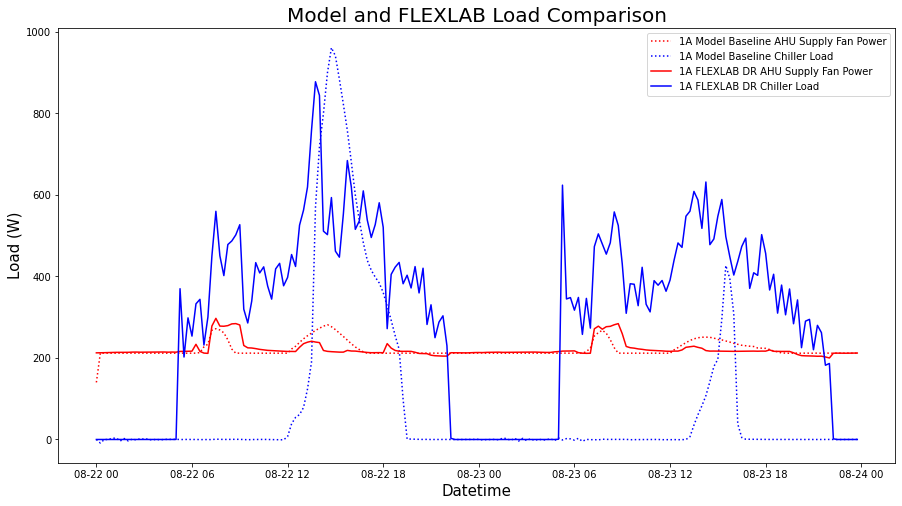

In [50]:
#data22['AHU: Supply Fan Power'].plot(kind='line',figsize=(15,8),legend=True)
#data22['Chiller_load'].plot(kind='line',figsize=(15,8),legend=True)
#data23['1A-El-AHU'].plot(kind='line',figsize=(15,8),legend=True)
#data23['Chiller_load'].plot(kind='line',figsize=(15,8),legend=True)

#data22_original['1A-El-CHWP'].plot(kind='line',figsize=(15,8),legend=True)
#data22_original['1A-El-Exhaust Fan'].plot(kind='line',figsize=(15,8),legend=True)






fig,ax_left=plt.subplots()

fig.set_size_inches(15, 8)

lns1=ax_left.plot(data22.index,data22['AHU: Supply Fan Power'],'r:',label="1A Model Baseline AHU Supply Fan Power")
lns2=ax_left.plot(data22.index,data22['Chiller_load'],'b:', label="1A Model Baseline Chiller Load")
lns3=ax_left.plot(data23.index,data23['1A-El-AHU'],'r-', label="1A FLEXLAB DR AHU Supply Fan Power")
lns4=ax_left.plot(data23.index,data23['Chiller_load'],'b-', label="1A FLEXLAB DR Chiller Load")
plt.title('Model and FLEXLAB Load Comparison',fontsize=20)
ax_left.set_xlabel('Datetime',fontsize=15)
ax_left.set_ylabel('Load (W)',fontsize=15)

lns=lns1+lns2+lns3+lns4
labs=[l.get_label() for l in lns]
ax_left.legend(lns,labs,bbox_to_anchor=(1, 1),loc=1,fontsize=10)
#ax_left.set_ylim([50,68.3])
#ax_right.set_ylim([-0.1,2.4])
plt.show()

In [29]:


en_1a = []
en_1b = []

# define dates for the calculation
for day in range(day_range[1], day_range[2]+1):    
    mask_1 = data23['date'] == datetime.date(2021, day_range[0], day)
    print(day)
    day_en_1a = round((data22['cooling_power [W]'][mask_1].sum()/4000),2)
    en_1a.append(day_en_1a)
      
    day_en_1b = round((data23['cooling_power [W]'][mask_1].sum()/4000),2)
    en_1b.append(day_en_1b)
    
print(en_1a)
print(en_1b)

22
23
[8.67, 5.87]
[12.85, 12.21]


/Users/huangwp/Documents/git/HIL-Sim/flexlab/test_data_analysis/db_plotting.py:38: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)


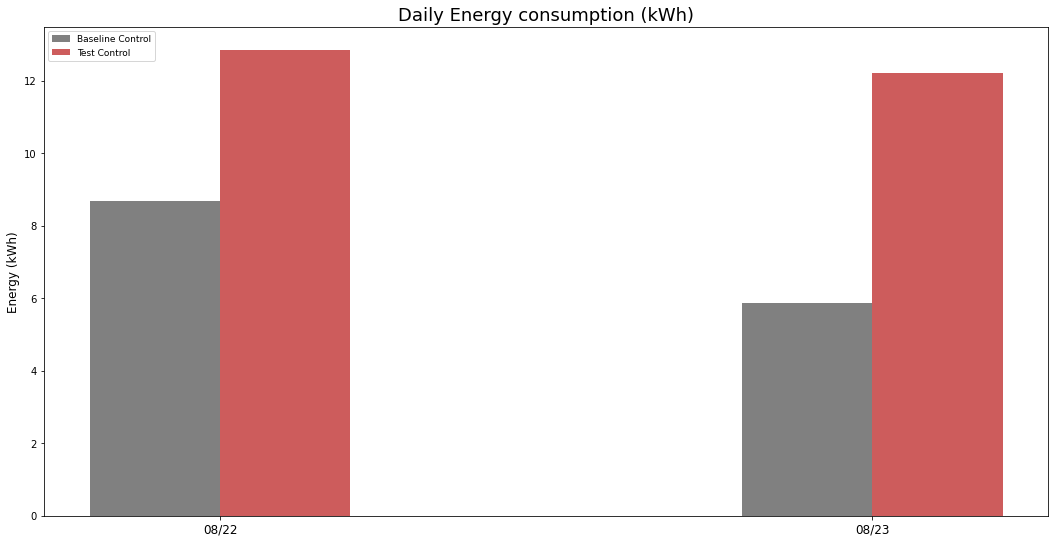

In [30]:
db_plotting.energy_plot(data23, en_1a, en_1b, 'Daily Energy consumption (kWh)', 'Energy (kWh)')

### Shed

In [31]:
#data23['G36 Demand Shed'] = data23['cooling_power [W]'] - data22['cooling_power [W]']

shed_1a = []
shed_1b = []

# define dates for the calculation
for day in range(day_range[1], day_range[2]+1):    
    mask_1 = data22['date'] == datetime.date(2021, day_range[0], day)
    #print(day) 
    day_shed_1a = (data22['cooling_power [W]'][mask_1][gta_ts].mean())
    shed_1a.append(day_shed_1a)
    
    day_shed_1b = (data23['cooling_power [W]'][mask_1][gta_ts].mean())
    shed_1b.append(day_shed_1b)


    #day_shed_1b = (data23['G36 Demand Shed'][mask_1][gta_ts].mean())
    #shed_1b.append(day_shed_1b)

In [32]:
data22['cooling_power [W]'][mask_1][gta_ts]

datetime
2021-08-23 14:15:00    358.490168
2021-08-23 14:30:00    392.244429
2021-08-23 14:45:00    427.949375
2021-08-23 15:00:00    441.985226
2021-08-23 15:15:00    539.706912
2021-08-23 15:30:00    668.398462
2021-08-23 15:45:00    633.929122
2021-08-23 16:00:00    543.393337
2021-08-23 16:15:00    271.326513
2021-08-23 16:30:00    235.774416
2021-08-23 16:45:00    230.634150
2021-08-23 17:00:00    229.474918
2021-08-23 17:15:00    228.524631
2021-08-23 17:30:00    224.797901
2021-08-23 17:45:00    224.376854
2021-08-23 18:00:00    223.717502
Freq: 15T, Name: cooling_power [W], dtype: float64

In [33]:
#print(data23['G36 Demand Shed'][gta_ts])
#print(data23['G36 Demand Shed'])

In [34]:
def shed_demand_plot(data, list_1, list_2, title, y_label):
    fig, (ax) = plt.subplots(nrows = 1, ncols = 1, constrained_layout=True, facecolor='w', edgecolor='k',figsize = (18,9))
    fig.subplots_adjust(hspace = .2, wspace=.15)

    inp_day = data['date'].unique() # capture unique dates from the date column
    inp_day = inp_day.tolist() #convert to a list
    #print(inp_day)
    # create labels for each date of the test
    labels = []
    labels1 = []
    for i in range(0,len(inp_day)):
        labels.append(inp_day[i].strftime('%m/%d'))

    #for i in range(0,len(inp_day)-1):
        #labels1.append(inp_day[i].strftime('%m/%d'))

    x = np.arange(len(labels))
    #x = np.arange(len(labels)-1)
    print(labels)
    print(list_2)
    width = .2

    ax.bar(x-width*.5, list_1, width = width, label='Baseline Control', color = 'dodgerblue')
    ax.bar(x+width*.5, list_2, width = width, label='Test Control', color = 'mediumseagreen')

    ax.set_xticks(range(len(labels)))
    #ax.set_xticks(range(len(labels)-1))
    ax.set_xticklabels(labels, fontsize = 12)
    #ax.set_xticklabels(labels[1:len(labels)+1], fontsize = 12)
    ax.set_title(title, fontsize = 18)
    ax.set_ylabel(y_label, fontsize = 12)
    ax.legend(fontsize = 9, loc = 2)

In [35]:
print(shed_1a)

[886.4602006076254, 367.17024483611385]


In [36]:
print(shed_1b)

[758.6352602893335, 693.7595732617453]


['08/22', '08/23']
[758.6352602893335, 693.7595732617453]


/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_1240/3893193546.py:3: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)


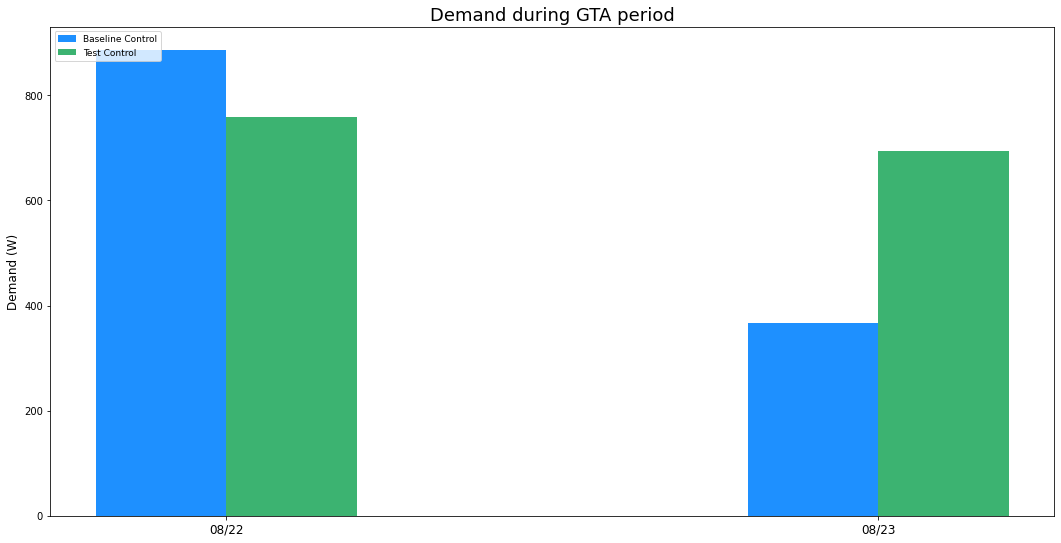

In [37]:

shed_demand_plot(data23, shed_1a, shed_1b, 'Demand during GTA period', 'Demand (W)')

### Thermal comfort

In [38]:
data22 = data22.assign(nor_zat_deg = 'nor_zat_deg') 
#for i in range(len(data20.index)):

def zat_col(df_zat, df_cool_sp):
    df_zat = df_zat.apply(lambda x: (x-32)/1.8)
    df_cool_sp = df_cool_sp.apply(lambda x: (x-32)/1.8)
    
    df_zat_deg = df_zat - df_cool_sp
    df_zat_deg = df_zat_deg.apply(lambda x:0 if x <= 0 else x)
    return (df_zat_deg)

In [39]:
data22['nor_zat_deg'] = zat_col(data22['VAV: North Zone Room Air Temperature'], data_baseline['1A-VAV1-OccupiedCoolingSetpt'])
data22['cor_zat_deg'] = zat_col(data22['VAV: Core Zone Room Air Temperature'], data_baseline['1A-VAV2-OccupiedCoolingSetpt'])
data22['sou_zat_deg'] = zat_col(data22['VAV: South Zone Room Air Temperature'], data_baseline['1A-VAV3-OccupiedCoolingSetpt'])

data23['nor_zat_deg'] = zat_col(data23['1A-VAV1-Zn_Temp'], data23['1A-VAV1-OccupiedCoolingSetpt'])
data23['cor_zat_deg'] = zat_col(data23['1A-VAV2-Zn_Temp'], data23['1A-VAV2-OccupiedCoolingSetpt'])
data23['sou_zat_deg'] = zat_col(data23['1A-VAV3-Zn_Temp'], data23['1A-VAV3-OccupiedCoolingSetpt'])



In [40]:
def calc_stats(df, df_temp):
   
    overshoot = []
    mean = []
    median = []
    std = []
    oc_st = datetime.time(7,0,0)
    oc_en = datetime.time(19,0,0)

    oc_time = ((df['time'] >= oc_st) & (df['time'] <= oc_en))
        
    for day in range(day_range[1],day_range[2]+1):    
        mask_1 = data22['date'] == datetime.date(2021, day_range[0], day)
        daily_mean = df_temp[mask_1][oc_time].mean()
        daily_median = df_temp[mask_1][oc_time].median()
        #print('Variance', df[df[i] > target[i]].var())
        daily_std = df_temp[mask_1][oc_time].std()
        
        mean.append(daily_mean)
        median.append(daily_median)
        std.append(daily_std)
        
        daily_shoot = sum(df_temp[mask_1][oc_time]*.25)
        counter = sum(df_temp[mask_1][oc_time]>0)
        overshoot.append(daily_shoot)
        

    return(overshoot, mean, median, std)

In [41]:
data22_nor_zat_deg, data22_nor_mean, data22_nor_median, data22_nor_std = calc_stats(data22, data22['nor_zat_deg'])
data22_cor_zat_deg, data22_cor_mean, data22_cor_median, data22_cor_std = calc_stats(data22, data22['cor_zat_deg'])
data22_sou_zat_deg, data22_sou_mean, data22_sou_median, data22_sou_std = calc_stats(data22, data22['sou_zat_deg'])

data23_nor_zat_deg, data23_nor_mean, data23_nor_median, data23_nor_std = calc_stats(data23, data23['nor_zat_deg'])
data23_cor_zat_deg, data23_cor_mean, data23_cor_median, data23_cor_std = calc_stats(data23, data23['cor_zat_deg'])
data23_sou_zat_deg, data23_sou_mean, data23_sou_median, data23_sou_std = calc_stats(data23, data23['sou_zat_deg'])

In [42]:
print(data22_nor_zat_deg, data22_nor_mean, data23_nor_median, data23_nor_std)

[0.0, 0.4202727777777788] [0.0, 0.034307981859410516] [0.0, 0.0] [0.0, 0.0]


In [43]:
scenario_dict = {}
scenario_dict[1] = calc_stats(data22, data22['nor_zat_deg'])
scenario_dict[2] = calc_stats(data22, data22['cor_zat_deg'])
scenario_dict[3] = calc_stats(data22, data22['sou_zat_deg'])

scenario_dict[4] = calc_stats(data23, data23['nor_zat_deg'])
scenario_dict[5] = calc_stats(data23, data23['cor_zat_deg'])
scenario_dict[6] = calc_stats(data23, data23['sou_zat_deg'])

In [44]:
scenario_dict = {'data22': {"nor": calc_stats(data22, data22['nor_zat_deg']),
                            "cor": calc_stats(data22, data22['cor_zat_deg']), 
                            "sou": calc_stats(data22, data22['sou_zat_deg'])}, 
                 
                 'data23': {"nor": calc_stats(data23, data23['nor_zat_deg']),
                            "cor": calc_stats(data23, data23['cor_zat_deg']), 
                            "sou": calc_stats(data23, data23['sou_zat_deg'])}}

In [45]:
print(scenario_dict['data23']['sou'])
print(scenario_dict['data23']['sou'][0][1:5])

([0.17361111111111338, 0.06250000000000355], [0.014172335600907214, 0.005102040816326821], [0.0, 0.0], [0.04309378864722256, 0.02484097401652986])
[0.06250000000000355]


In [46]:
print(sum(data22_nor_zat_deg), sum(data23_nor_zat_deg))
print(sum(data22_cor_zat_deg), sum(data23_cor_zat_deg))
print(sum(data22_sou_zat_deg), sum(data23_sou_zat_deg))

0.4202727777777788 0.0
0.11495638888889292 0.0
3.3637198611111128 0.23611111111111693


In [47]:
print(data22_nor_zat_deg,data22_cor_zat_deg,data22_sou_zat_deg)
print(data23_nor_zat_deg,data23_cor_zat_deg,data23_sou_zat_deg)

[0.0, 0.4202727777777788] [0.0, 0.11495638888889292] [2.238131805555554, 1.1255880555555589]
[0.0, 0.0] [0.0, 0.0] [0.17361111111111338, 0.06250000000000355]


['08/22', '08/23']
[datetime.date(2021, 8, 22) datetime.date(2021, 8, 23)]
[0.0, 0.034307981859410516]


/Users/huangwp/Documents/git/HIL-Sim/flexlab/test_data_analysis/db_plotting.py:142: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)
/Users/huangwp/Documents/git/HIL-Sim/flexlab/test_data_analysis/db_plotting.py:214: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels, fontsize = 12)


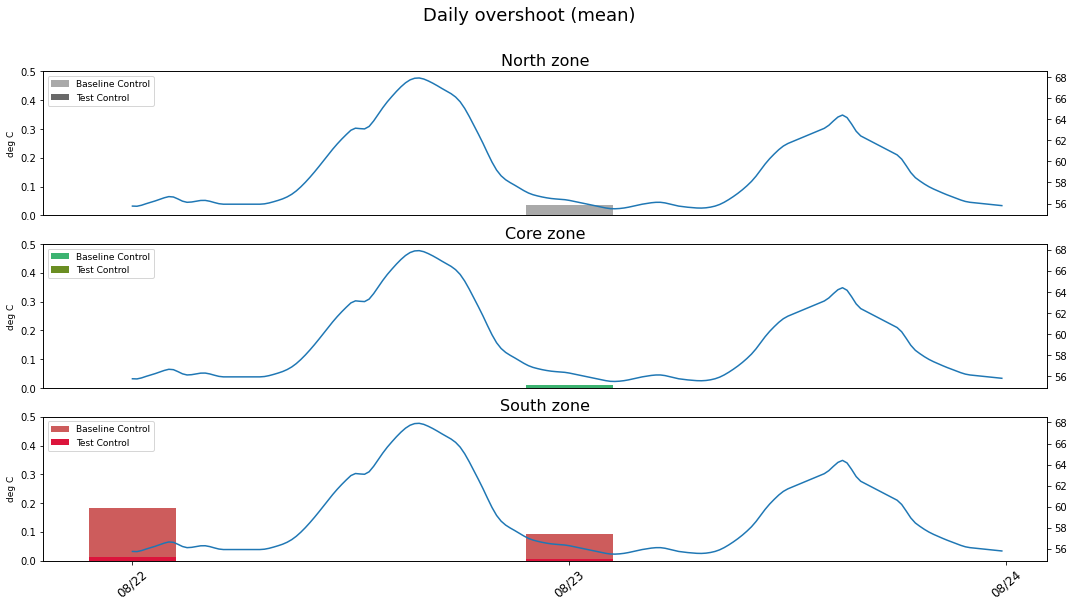

In [48]:
# key for metrics to be plotted in the scenario dictionary; {1:'overshoot', 2:'mean', 3:'median', 4:'std_dev'}
title_dict = {1: 'Daily overshoot (deg C hour)', 2:'Daily overshoot (mean)', 3:'Daily overshoot (median)' , 4:'Daily overshoot (standard deviation)'}
ylabel = {1: 'deg C - hour', 2: 'deg C', 3: 'deg C', 4: 'deg C'}
db_plotting.thermal_comfort_plot(data22, scenario_dict['data22']['nor'], scenario_dict['data23']['nor'], 
                                 scenario_dict['data22']['cor'], scenario_dict['data23']['cor'], 
                                 scenario_dict['data22']['sou'], scenario_dict['data23']['sou'],
                                 scenario_dict, 1, ylabel[2], title_dict[2])

# Zone Air Temperature

/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_1240/1970640757.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .4, wspace=.15)


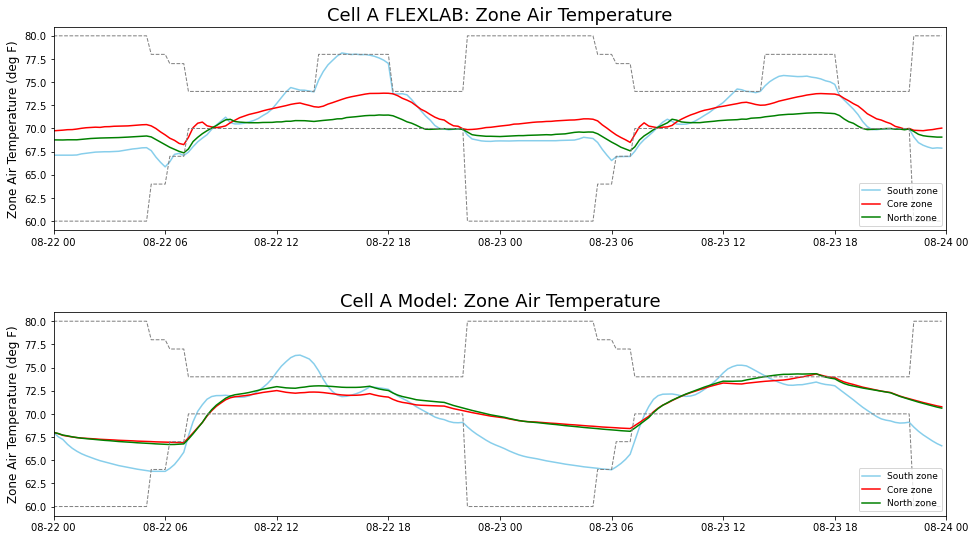

In [49]:
fig, (ax1, ax) = plt.subplots(nrows = 2, ncols = 1, constrained_layout=True, facecolor='w', edgecolor='k',figsize = (16,9))
fig.subplots_adjust(hspace = .4, wspace=.15)

ax1.plot(data23['1A-VAV3-Zn_Temp'], label = 'South zone', color = 'skyblue')
ax1.plot(data23['1A-VAV2-Zn_Temp'], label = 'Core zone', color = 'red')
ax1.plot(data23['1A-VAV1-Zn_Temp'], label = 'North zone', color = 'green')
ax1.plot(data23['1A-VAV3-OccupiedCoolingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')
ax1.plot(data23['1A-VAV3-OccupiedHeatingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')

ax.plot(data22['VAV: South Zone Room Air Temperature'], label = 'South zone', color = 'skyblue')
ax.plot(data22['VAV: Core Zone Room Air Temperature'], label = 'Core zone', color = 'red')
ax.plot(data22['VAV: North Zone Room Air Temperature'], label = 'North zone', color = 'green')
ax.plot(data_baseline['1A-VAV3-OccupiedCoolingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')
ax.plot(data_baseline['1A-VAV3-OccupiedHeatingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')

ax1.set_ylabel('Zone Air Temperature (deg F)', fontsize = 12)
ax.set_ylabel('Zone Air Temperature (deg F)', fontsize = 12)

ax1.set_title('Cell A FLEXLAB: Zone Air Temperature', fontsize = 18)
ax.set_title('Cell A Model: Zone Air Temperature', fontsize = 18)

ax1.set_xlim([datetime.date(2021, day_range[0], day_range[1]),datetime.date(2021, day_range[0], day_range[2]+1)]) 
ax.set_xlim([datetime.date(2021, day_range[0], day_range[1]),datetime.date(2021, day_range[0], day_range[2]+1)])


#ax1.set_xlim(["2021-08-20 08:50:00"],["2021-08-22 00:00:00"]) 
#ax.set_xlim(["2021-08-20 08:50:00"],["2021-08-22 00:00:00"])

ax.legend(fontsize = 9, loc = 4)
ax1.legend(fontsize = 9, loc = 4)